In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [5]:
eq = pd.read_csv("earthquakes-1.csv")
eq.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


In [3]:
fb = pd.read_csv("fb_stock_prices_2018.csv")
fb.head()

,date,open,high,low,close,volume
0,2018-01-02,177.68,181.58,177.5500,181.42,18151903
1,2018-01-03,181.88,184.78,181.3300,184.67,16886563
2,2018-01-04,184.90,186.21,184.0996,184.33,13880896
3,2018-01-05,185.59,186.90,184.9300,186.85,13574535
4,2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [7]:
mb_eq = eq[eq['magType'] == 'mb']
mb_eq

,mag,magType,time,place,tsunami,parsed_place
9,4.7,mb,1539472814760,"219km SSE of Saparua, Indonesia",0,Indonesia
13,4.5,mb,1539470898340,"120km SSW of Banda Aceh, Indonesia",0,Indonesia
55,4.6,mb,1539453241120,"242km NNW of Farallon de Pajaros, Northern Mar...",0,Northern Mariana Islands
67,4.6,mb,1539448501800,"160km NNW of Nago, Japan",0,Japan
91,4.7,mb,1539437762090,"32km SE of Muisne, Ecuador",0,Ecuador
...,...,...,...,...,...,...
9297,4.2,mb,1537238925690,"2km NE of Kato Achaia, Greece",0,Greece
9304,5.1,mb,1537236235470,"34km NW of Finschhafen, Papua New Guinea",1,Papua New Guinea
9309,4.8,mb,1537234582260,"11km ESE of Rotorua, New Zealand",0,New Zealand
9319,4.4,mb,1537231966170,"58km W of San Antonio de los Cobres, Argentina",0,Argentina


In [9]:
corr = mb_eq[['mag', 'tsunami']].corr()
corr

,mag,tsunami
mag,1.000000,0.448921
tsunami,0.448921,1.000000


###  1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.

<Axes: >

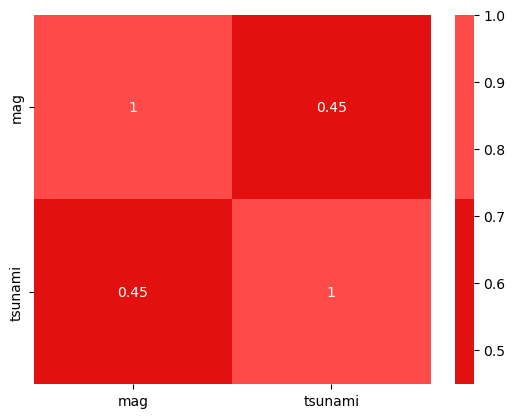

In [31]:
color=sn.color_palette(["#e31010","#ff4a4a"])
sn.heatmap(corr,annot=True,cmap = color)

### 2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)

In [36]:
vol_q1 = fb.volume.quantile(.25)
vol_q3 = fb.volume.quantile(.75)
iqr = vol_q1 - vol_q3

In [40]:
#Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
vol_bound1 = vol_q1 - 1.5 * iqr
vol_bound2 = vol_q3 + 1.5 * iqr

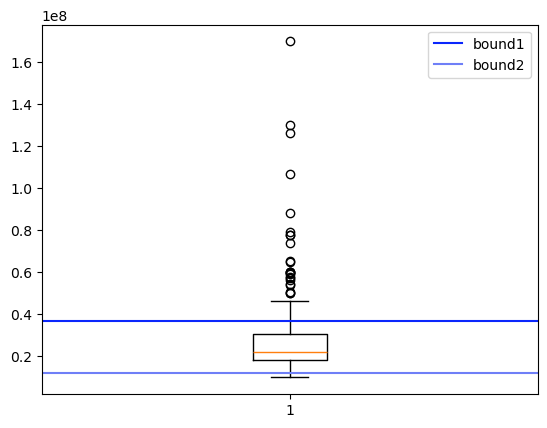

In [85]:
plt.boxplot(fb.volume,vert=True)
plt.axhline(vol_bound1,color="#0a26fc",label="bound1")
plt.axhline(vol_bound2,color="#6f7ff7",label="bound2")
plt.legend()
plt.show()

In [79]:
# copy the top for closing price
close_q1 = fb.close.quantile(.25)
close_q3 = fb.close.quantile(.75)
iqr = close_q1 - close_q3

In [81]:
#Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
close_bound1 = close_q1 - 1.5 * iqr
close_bound2 = close_q3 + 1.5 * iqr

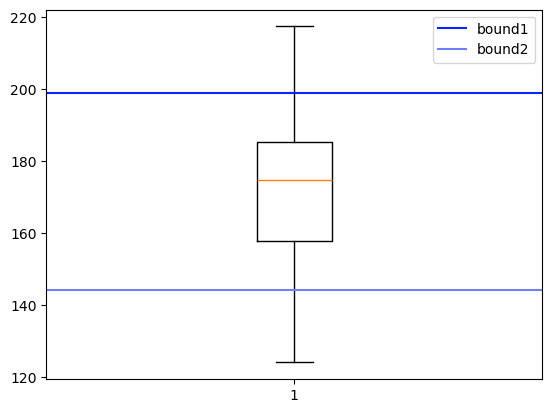

In [91]:
plt.boxplot(fb.close,vert=True)
plt.axhline(close_bound1,color="#0a26fc",label="bound1")
plt.axhline(close_bound2,color="#6f7ff7",label="bound2")
plt.legend()
plt.show()

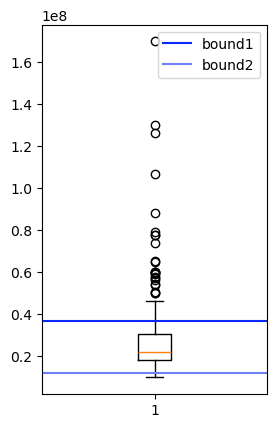

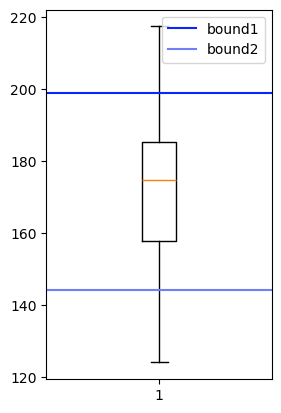

In [97]:
vol_q1 = fb.volume.quantile(.25)
vol_q3 = fb.volume.quantile(.75)
iqr = vol_q1 - vol_q3

#Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
vol_bound1 = vol_q1 - 1.5 * iqr
vol_bound2 = vol_q3 + 1.5 * iqr

plt.subplot(1, 2, 1)
plt.boxplot(fb.volume,vert=True)
plt.axhline(vol_bound1,color="#0a26fc",label="bound1")
plt.axhline(vol_bound2,color="#6f7ff7",label="bound2")
plt.legend()
plt.show()

close_q1 = fb.close.quantile(.25)
close_q3 = fb.close.quantile(.75)
iqr = close_q1 - close_q3

#Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
close_bound1 = close_q1 - 1.5 * iqr
close_bound2 = close_q3 + 1.5 * iqr

plt.subplot(1, 2, 2)
plt.boxplot(fb.close,vert=True)
plt.axhline(close_bound1,color="#0a26fc",label="bound1")
plt.axhline(close_bound2,color="#6f7ff7",label="bound2")
plt.legend()
plt.show()

### 3. Fill in the area between the bounds in the plot from exercise #2.


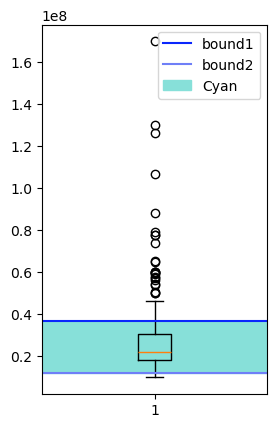

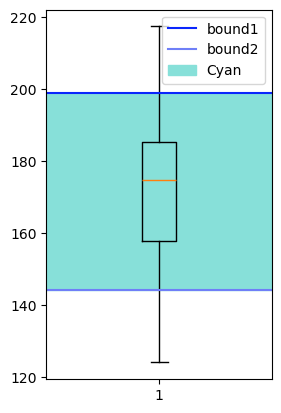

In [123]:
vol_q1 = fb.volume.quantile(.25)
vol_q3 = fb.volume.quantile(.75)
iqr = vol_q1 - vol_q3

#Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
vol_bound1 = vol_q1 - 1.5 * iqr
vol_bound2 = vol_q3 + 1.5 * iqr

plt.subplot(1, 2, 1)
plt.boxplot(fb.volume,vert=True)
plt.axhline(vol_bound1,color="#0a26fc",label="bound1")
plt.axhline(vol_bound2,color="#6f7ff7",label="bound2")
plt.axhspan(vol_bound1, vol_bound2, color='#87e0d9', label='Cyan')
plt.legend()
plt.show()

close_q1 = fb.close.quantile(.25)
close_q3 = fb.close.quantile(.75)
iqr = close_q1 - close_q3

#Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
close_bound1 = close_q1 - 1.5 * iqr
close_bound2 = close_q3 + 1.5 * iqr

plt.subplot(1, 2, 2)
plt.boxplot(fb.close,vert=True)
plt.axhline(close_bound1,color="#0a26fc",label="bound1")
plt.axhline(close_bound2,color="#6f7ff7",label="bound2")
plt.axhspan(close_bound1, close_bound2, color='#87e0d9', label='Cyan')

plt.legend()
plt.show()


### 4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.

In [129]:
fb.date = pd.to_datetime(fb.date)

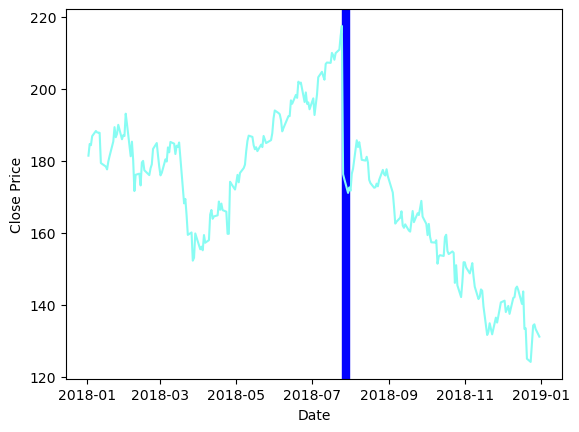

In [145]:
plt.plot(fb.date, fb.close,color = "#88fcf3" )
plt.axvspan(pd.Timestamp('2018-07-25'), pd.Timestamp('2018-07-31'),color = "#0303ff")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

### 5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
- Disappointing user growth: Announced after close on July 25, 2018
- Cambridge Analytica story: Breaks on March 19, 2018 (when it affected the market)
- FTC investigation: Launched on March 20, 2018018`018

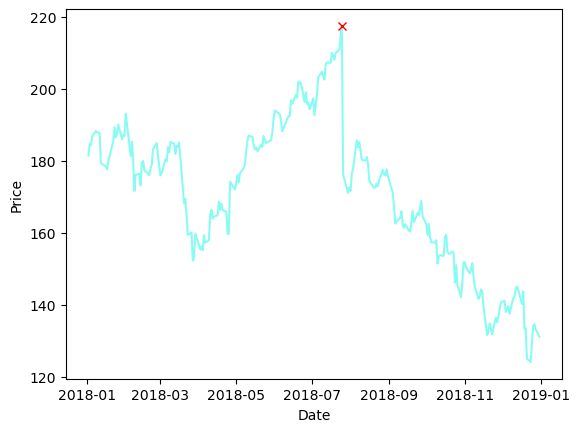

In [253]:
plt.plot(fb.date, fb.close,color = "#88fcf3")
event = pd.to_datetime(["2018-07-25","2018-03-19","2018-03-20"])
# store the event in the list. with the formated yyyy,mm,dd

growthPrice = fb.loc[fb.date == event[0], 'close'].values[0]
plt.plot(event[0], growthPrice, marker='x', color='red')
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

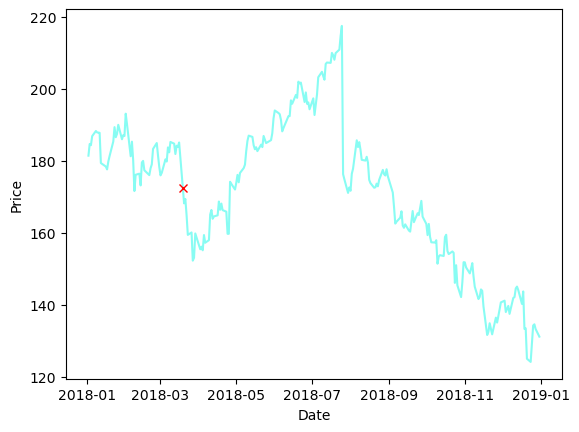

In [255]:
plt.plot(fb.date, fb.close,color = "#88fcf3")
CA = fb.loc[fb.date == event[1], 'close'].values[0]
plt.plot(event[1], CA, marker='x', color='red')
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

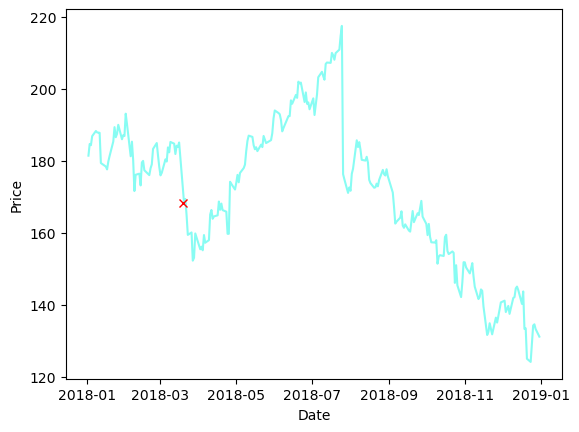

In [257]:
plt.plot(fb.date, fb.close,color = "#88fcf3")
FTC = fb.loc[fb.date == event[2], 'close'].values[0]
plt.plot(event[1], FTC, marker='x', color='red')
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

### 6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

In [328]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def reg_resid_plots(x, y, data, cmap_name='Set2'):

    X = data[[x]]
    y_vals = data[y]

    model = LinearRegression().fit(X, y_vals)

    preds = model.predict(X)
    residuals = y_vals - preds

    colors = plt.colormaps[cmap_name](range(len(data)))

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].scatter(X, y_vals, color=colors, s=50)
    axes[0].plot(X, preds, color='black')
    axes[0].set_title("Regression Plot")

    axes[1].scatter(preds, residuals, color=colors, s=50)
    axes[1].axhline(0, color='black', linestyle='--')
    axes[1].set_title("Residuals Plot")

    plt.tight_layout()
    plt.show()


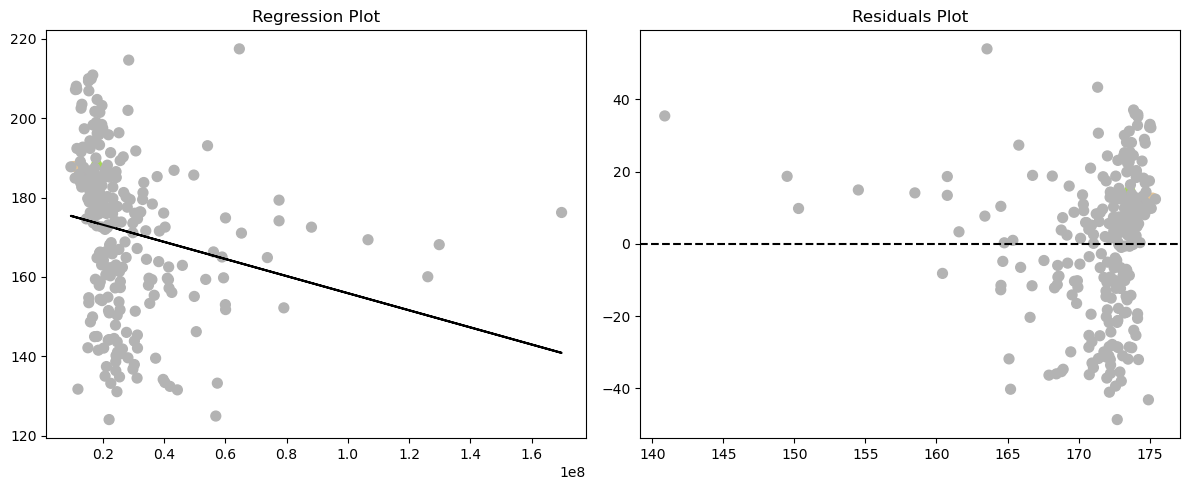

In [330]:
reg_resid_plots('volume','close', fb)

### Conclusion
I enjoy doing this activity because of the challenge. It makes me think hard and learn new things like axhline,axhspan, and axvspan. I don't know them before but now i kinda get how they work. Many times may code is not working, because some parameter error and i learn how to use tukey fence. and in the last part i ask my friend to help me like docta.